<a href="https://colab.research.google.com/github/goyaljai1/Data_Analysis_Projects/blob/main/Case_Study_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on Forest Fire Data

In [ ]:
#importing dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d gustavomodelli/forest-fires-in-brazil

  0% 0.00/31.1k [00:00<?, ?B/s]
100% 31.1k/31.1k [00:00<00:00, 76.6MB/s]


In [ ]:
!unzip "forest-fires-in-brazil.zip"

Archive:  forest-fires-in-brazil.zip
  inflating: amazon.csv              


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset
df = pd.read_csv("amazon.csv", encoding = "iso-8859-1")

In [ ]:
#printing functions
def hr_line():
  print('-'*125)


In [ ]:
def basic_info(df):
  #Basic Info
  print("\033[1m" + "Top 5 Rows" + "\033[0m")
  print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Random 5 Rows" + "\033[0m")
  print(tabulate(df.sample(5), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Last 5 Rows" + "\033[0m")
  print(tabulate(df.tail(), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Column List" + "\033[0m")
  print(df.columns.to_list())
  hr_line()
  print("\033[1m" + "Shape" + "\033[0m")
  print("Number of Rows: ", df.shape[0])
  print("Number of Columns: ", df.shape[1])
  hr_line()
  print("\033[1m" + "Datatypes of each Column" + "\033[0m")
  print(pd.DataFrame(df.dtypes).to_string(header=False))
  hr_line()
  #Duplicates
  print("\033[1m" + "All Occurances of Duplicated Rows" + "\033[0m")
  repeated_rows = df[df.duplicated(keep=False)]
  occurrences = df.groupby(list(df.columns)).size().reset_index(name='Occurrences')
  repeated_rows_with_occurrences = pd.merge(repeated_rows, occurrences, on=list(df.columns))
  print(tabulate(repeated_rows_with_occurrences, headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Total Number of Duplicated Rows" + "\033[0m")
  print(df.duplicated().sum())
  hr_line()
  print("\033[1m" + "Shape After Removing Duplicates" + "\033[0m")
  df.drop_duplicates(inplace = True)
  print("Number of Rows: ", df.shape[0])
  print("Number of Columns: ", df.shape[1])
  hr_line()
  #Null Values
  print("\033[1m" + "Null values in each Column" + "\033[0m")
  print(df.isnull().sum().to_string(header=False))
  hr_line()
  print("\033[1m" + "% Null values in each Column" + "\033[0m")
  print((df.isnull().sum()*100/len(df)).to_string(header=False))
  hr_line()
  print("\033[1m" + "Memory Usage of Dataframe" + "\033[0m")
  print(round(df.memory_usage(deep=True).sum()/1000000, 2), "Mb")
  hr_line()
  print("\033[1m" + "Statistical Information" + "\033[0m")
  print(tabulate(df.describe(), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "# Unique Values" + "\033[0m")
  col = df.columns.to_list()
  for x in col:
    print("Number of unique values in column",x,"=" ,len(df[x].unique()))

In [ ]:
basic_info(df)

Top 5 Rows
╒════╤════════╤═════════╤═════════╤══════════╤════════════╕
│    │   year │ state   │ month   │   number │ date       │
╞════╪════════╪═════════╪═════════╪══════════╪════════════╡
│  0 │   1998 │ Acre    │ Janeiro │        0 │ 1998-01-01 │
├────┼────────┼─────────┼─────────┼──────────┼────────────┤
│  1 │   1999 │ Acre    │ Janeiro │        0 │ 1999-01-01 │
├────┼────────┼─────────┼─────────┼──────────┼────────────┤
│  2 │   2000 │ Acre    │ Janeiro │        0 │ 2000-01-01 │
├────┼────────┼─────────┼─────────┼──────────┼────────────┤
│  3 │   2001 │ Acre    │ Janeiro │        0 │ 2001-01-01 │
├────┼────────┼─────────┼─────────┼──────────┼────────────┤
│  4 │   2002 │ Acre    │ Janeiro │        0 │ 2002-01-01 │
╘════╧════════╧═════════╧═════════╧══════════╧════════════╛
-----------------------------------------------------------------------------------------
Random 5 Rows
╒══════╤════════╤═══════════╤═══════════╤══════════╤════════════╕
│      │   year │ state     │ month    

In [ ]:
df['month_new'] = df['month'].map({ 'Janeiro' : 'jan',
                                     'Fevereiro' : 'feb',
                                      'Março' : 'march',
                                      'Abril' : 'april',
                                      'Maio' : 'may',
                                      'Junho' : 'jun',
                                      'Julho' : 'july',
                                      'Agosto' : 'aug',
                                      'Setembro' : 'sept',
                                      'Outubro' : 'oct',
                                      'Novembro' : 'nov',
                                      'Dezembro' : 'dec' })

In [ ]:
#in which month maximum number of forest fire registered
df.groupby('month_new')['number'].sum().sort_values(ascending = False).head(1)

month_new
july    92319.113
Name: number, dtype: float64

<Axes: xlabel='month_new', ylabel='number'>

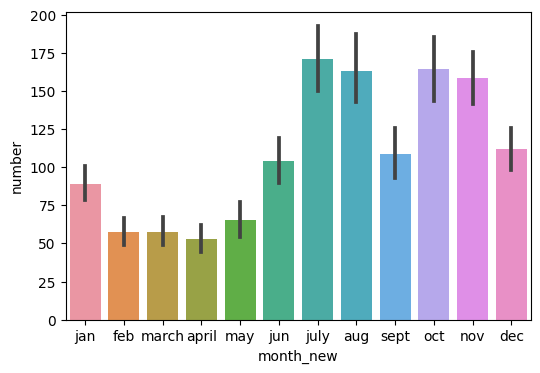

In [ ]:
f = plt.figure()
f.set_figheight(4)
f.set_figwidth(6)
sns.barplot(data = df, x = 'month_new', y = 'number')

In [ ]:
#year of maximum forest fire
df.groupby('year')['number'].sum().sort_values(ascending = False).head(1)

year
2003    42760.674
Name: number, dtype: float64

<Axes: xlabel='year', ylabel='number'>

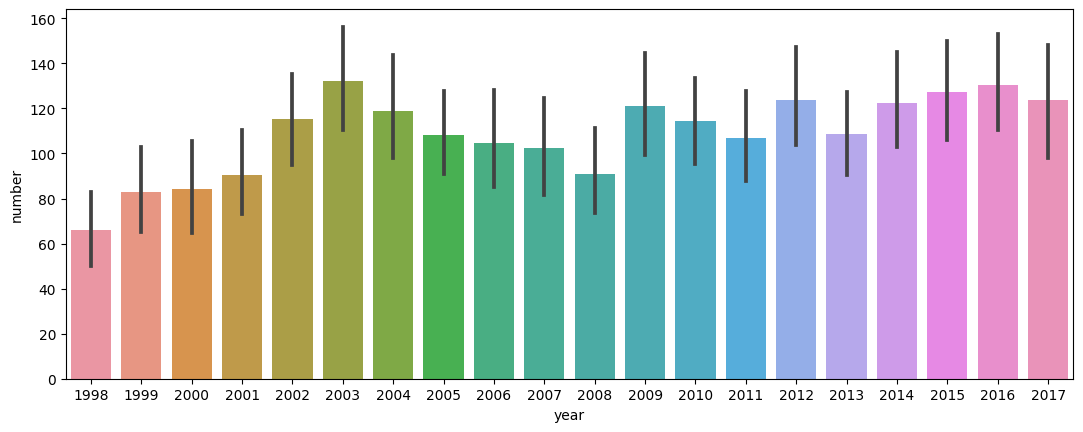

In [ ]:
f = plt.figure()
f.set_figwidth(13)
sns.barplot(data = df, x = 'year', y = 'number')

In [ ]:
#state of maximum forest fire
df.groupby('state')['number'].sum().sort_values(ascending = False).head(1)

state
Mato Grosso    96246.028
Name: number, dtype: float64

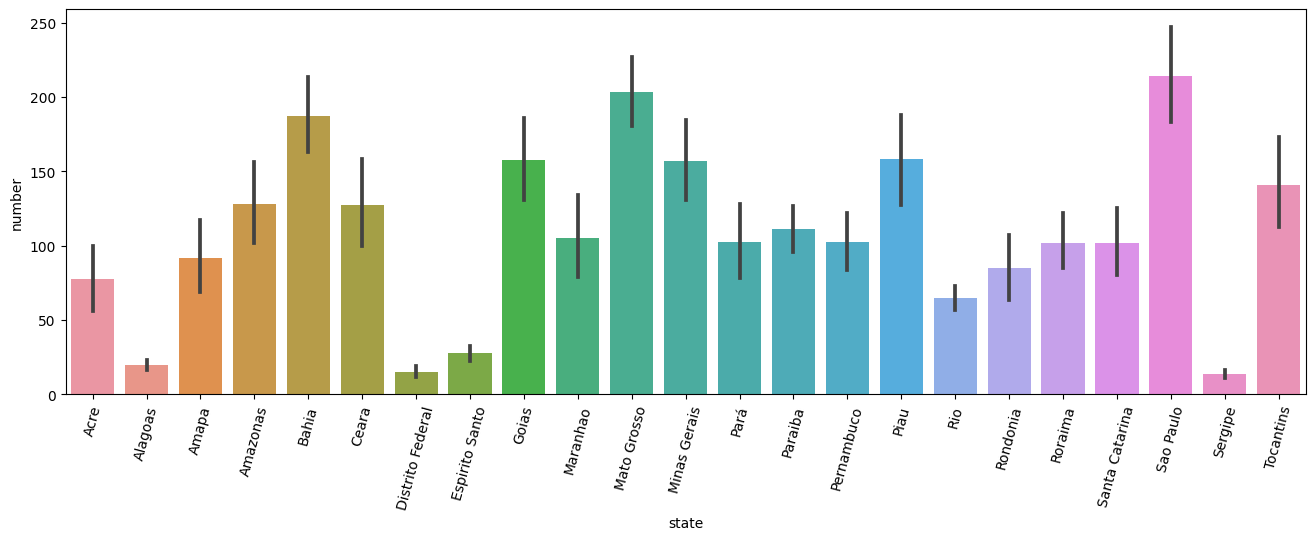

In [ ]:
f = plt.figure(figsize = (16,5))
sns.barplot(data = df, x = 'state', y = 'number')
plt.xticks(rotation = 75)
plt.show()

In [ ]:
#total number of fires reported in amazonas
df[df['state'] == 'Amazonas']['number'].sum()

30650.129

In [ ]:
#total number of fires reported in amazonas year wise
df_new = df[df['state'] == 'Amazonas']

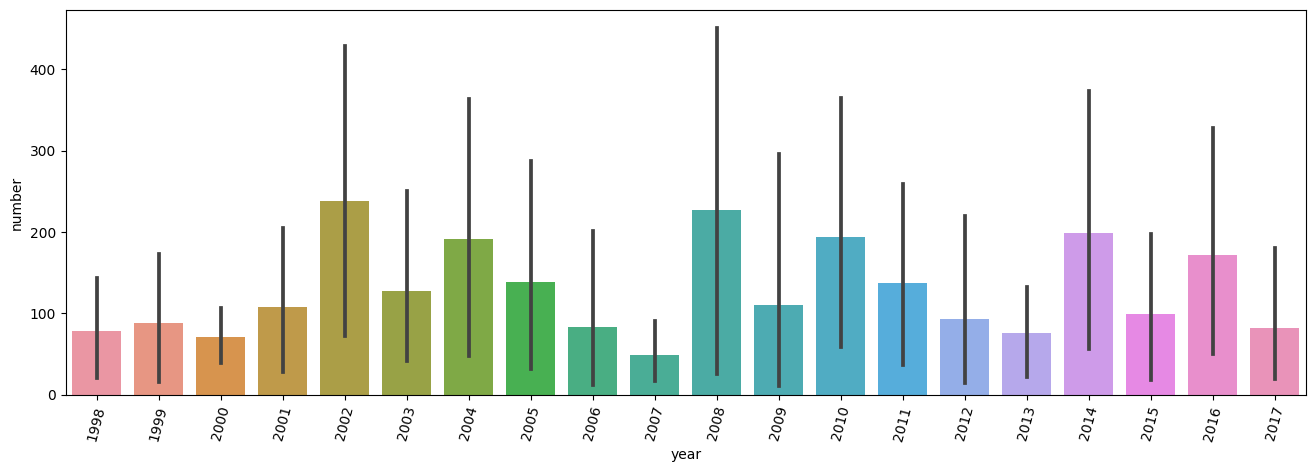

In [ ]:
f = plt.figure(figsize = (16,5))
sns.barplot(data = df_new, x = 'year', y = 'number')
plt.xticks(rotation = 75)
plt.show()